# Week 5 HW assignment
### Choose 4 stocks of your choice and create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

needed imports 

In [7]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["NIO", "^GSPC", "AMZN", "TGT"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [8]:
data_dict

{'NIO':                  High        Low       Open      Close     Volume  Adj Close
 Date                                                                        
 2018-09-12   6.930000   5.350000   6.000000   6.600000   66849000   6.600000
 2018-09-13  12.690000   6.520000   6.620000  11.600000  158346500  11.600000
 2018-09-14  13.800000   9.220000  12.660000   9.900000  172473600   9.900000
 2018-09-17   9.750000   8.500000   9.610000   8.500000   56323900   8.500000
 2018-09-18   9.100000   7.670000   8.730000   7.680000   41827600   7.680000
 ...               ...        ...        ...        ...        ...        ...
 2021-09-22  35.830002  35.119999  35.209999  35.700001   26608000  35.700001
 2021-09-23  36.500000  35.570000  36.200001  36.009998   27152700  36.009998
 2021-09-24  36.070000  35.200001  35.590000  35.380001   23709300  35.380001
 2021-09-27  36.860001  34.419998  35.430000  36.770000   36093000  36.770000
 2021-09-28  37.029999  34.930099  36.279999  35.049999  

#### gather closing price data 

In [9]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,NIO,^GSPC,AMZN,TGT
Date,,,,
2012-01-03,NaN,1277.060059,179.029999,51.119999
2012-01-04,NaN,1277.300049,177.509995,50.000000
2012-01-05,NaN,1281.060059,177.610001,48.509998
2012-01-06,NaN,1277.810059,182.610001,48.950001
2012-01-09,NaN,1280.699951,178.559998,48.570000
...,...,...,...,...
2021-09-22,35.700001,4395.640137,3380.050049,241.770004
2021-09-23,36.009998,4448.979980,3416.000000,242.669998
2021-09-24,35.380001,4455.479980,3425.520020,241.440002


<ipython-input-10-a129c9a2913a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


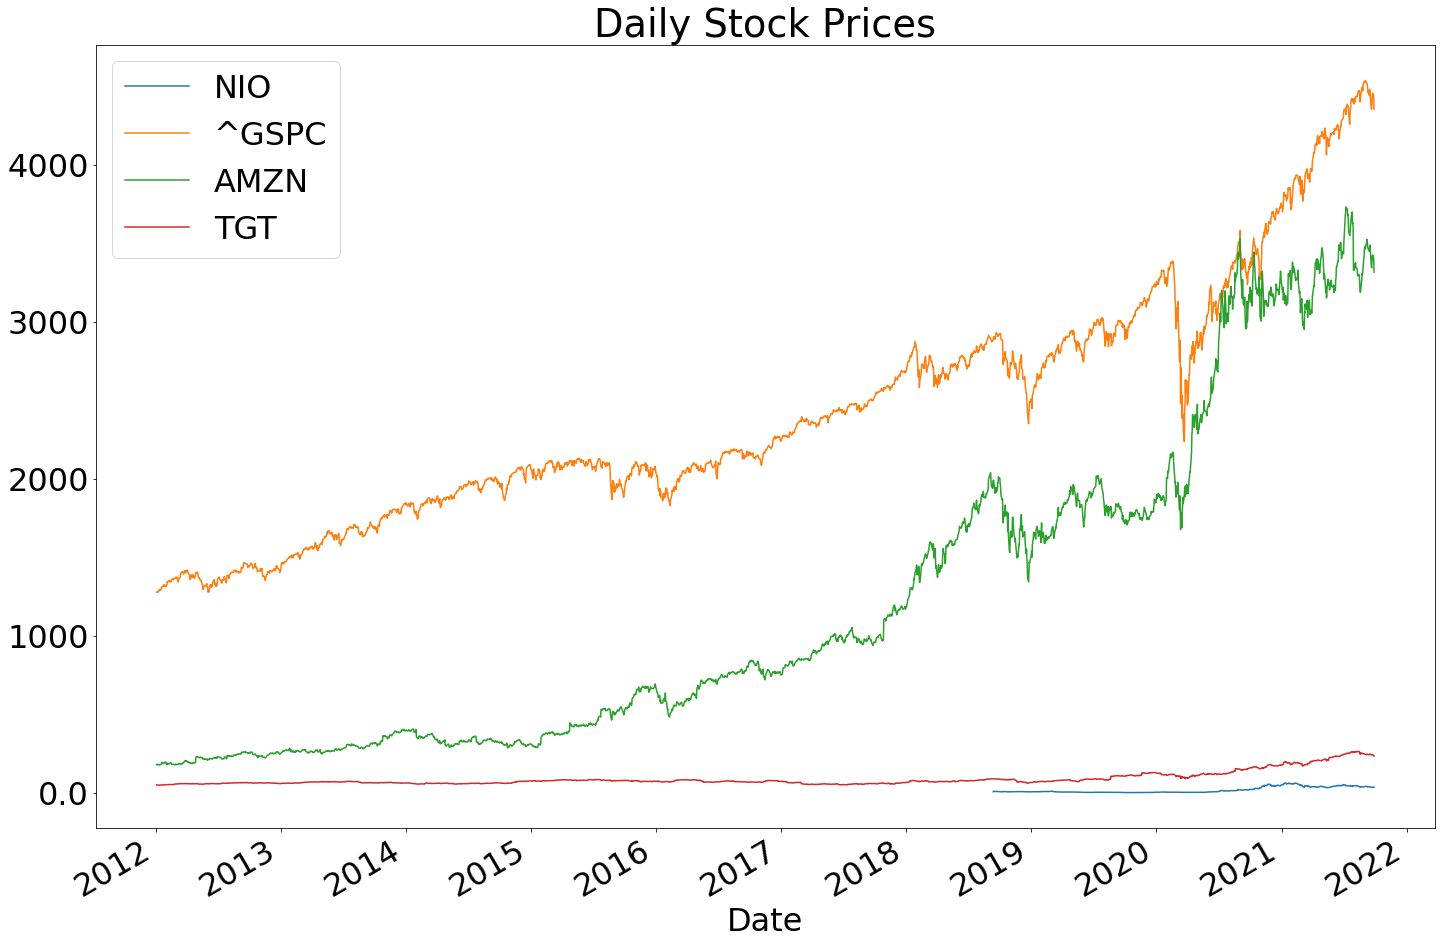

In [10]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

That was the non-logged scale, we now recreate the plot with a loig scale to show proportional change, and with an added effect that would be appreciated in a proffessional meeting 

In [ ]:
!pip install mplcyberpunk
  
import matplotlib.pyplot as plt
import mplcyberpunk

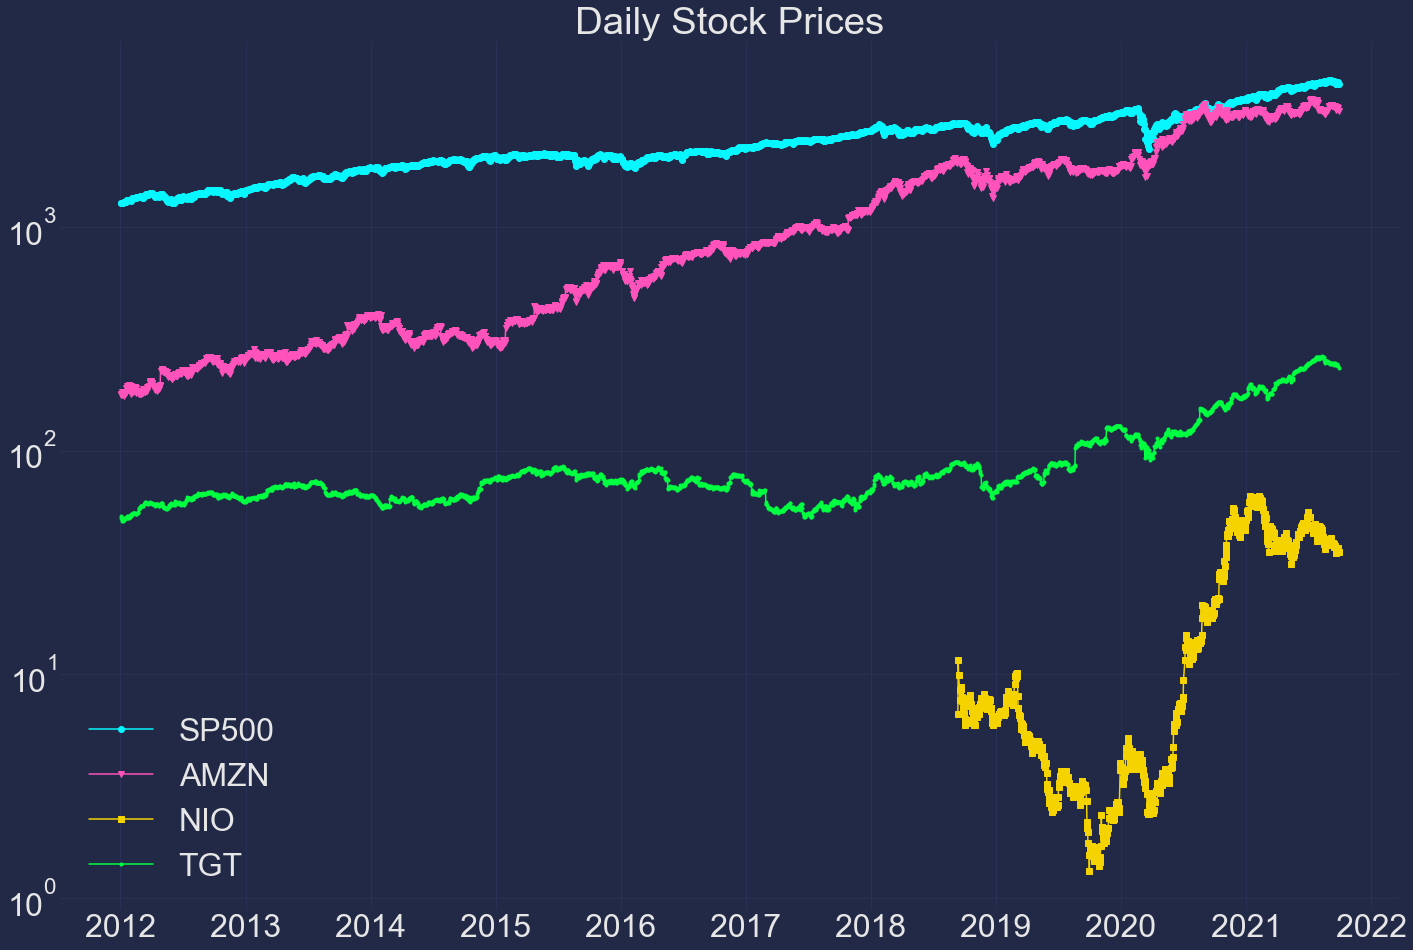

In [27]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
plt.style.use("cyberpunk")
plt.plot(close_data['^GSPC'], marker='o', label = 'SP500')
plt.plot(close_data['AMZN'], marker='v', label = 'AMZN')
plt.plot(close_data['NIO'], marker='s', label = 'NIO')
plt.plot(close_data['TGT'], marker='.', label = 'TGT')
plt.legend()
plt.title("Daily Stock Prices")
plt.yscale('log')

plt.show()

Lets take a look at the percent change to see which stocks tend to haver the biggest daily jumps: 

<ipython-input-20-dea9c68cf224>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


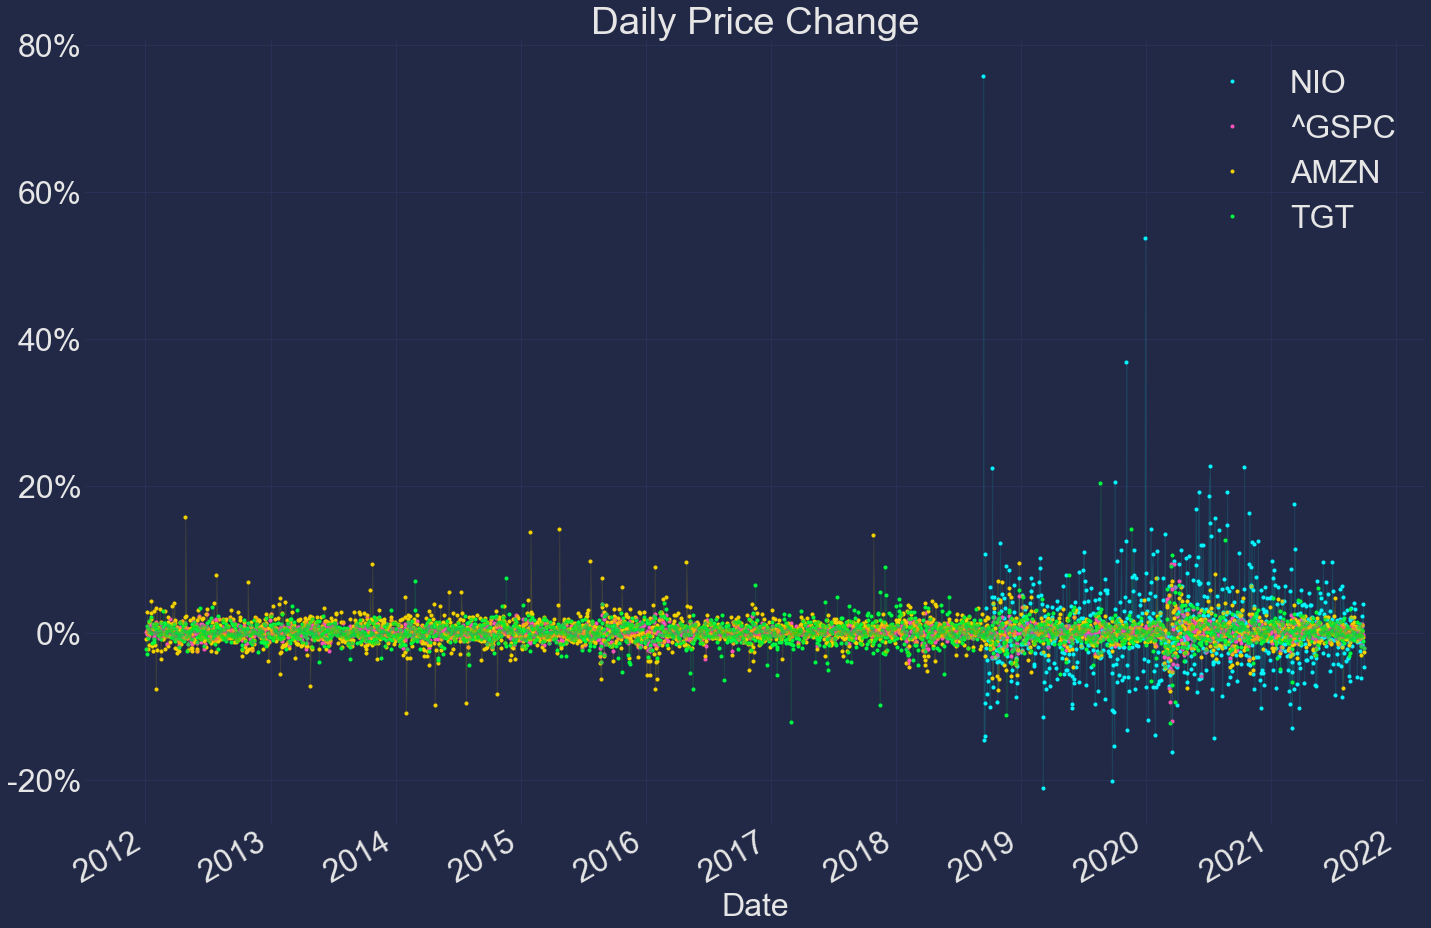

In [20]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
plt.style.use("cyberpunk")

for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    
mplcyberpunk.add_glow_effects()
plt.show()
plt.close()

as we can see, the NIO stock has been extremely volatile, with a much fatter spread of % change since it IPO'd in 2018. 

Time to analyze some statitstics of our stocks. We will import the stats package from python as well as make a couple of our own for skewness and kurtosis

In [50]:
import statistics as stats
def skewness(list_obj, sample = False):
        mean_ = stats.mean(list_obj)
        SD_ = stats.stdev(list_obj, sample)
        skew = 0
        n = len(list_obj)
        for val in list_obj:
            skew += (val - mean_) ** 3
            skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)

        return skew
    
def kurtosis(list_obj, sample = False):
        mean_ = stats.mean(list_obj)
        kurt = 0
        SD_ = stats.stdev(list_obj, sample)
        n = len(list_obj)
        for x in list_obj:
            kurt += (x - mean_) ** 4
        kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
        ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))

        return kurt
    
def gatherstatistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(stats.mean(val),3)
        dct[key]["median"] = round(stats.median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(stats.variance(val, sample),3)
        dct[key]["S.D."] = round(stats.stdev(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [51]:
stats_df = gatherstatistics(price_change_data, sample = True)
stats_df

,NIO,^GSPC,AMZN,TGT
mean,0.414,0.055,0.137,0.075
median,-0.214,0.065,0.115,0.078
variance,43.689,1.961,4.394,3.506
S.D.,6.610,1.400,2.096,1.873
skewness,-0.001,-0.001,-0.001,-0.001
kurtosis,23970.117,17121.977,18923.090,32948.547


Just looking at the variiance, we can see NIO has been jusst a bit more volatile... by 10x the other stocks. Which is also why I have chosen to invest my college savings in it 

array([<AxesSubplot:title={'center':'NIO'}>,
       <AxesSubplot:title={'center':'^GSPC'}>,
       <AxesSubplot:title={'center':'AMZN'}>,
       <AxesSubplot:title={'center':'TGT'}>], dtype=object)

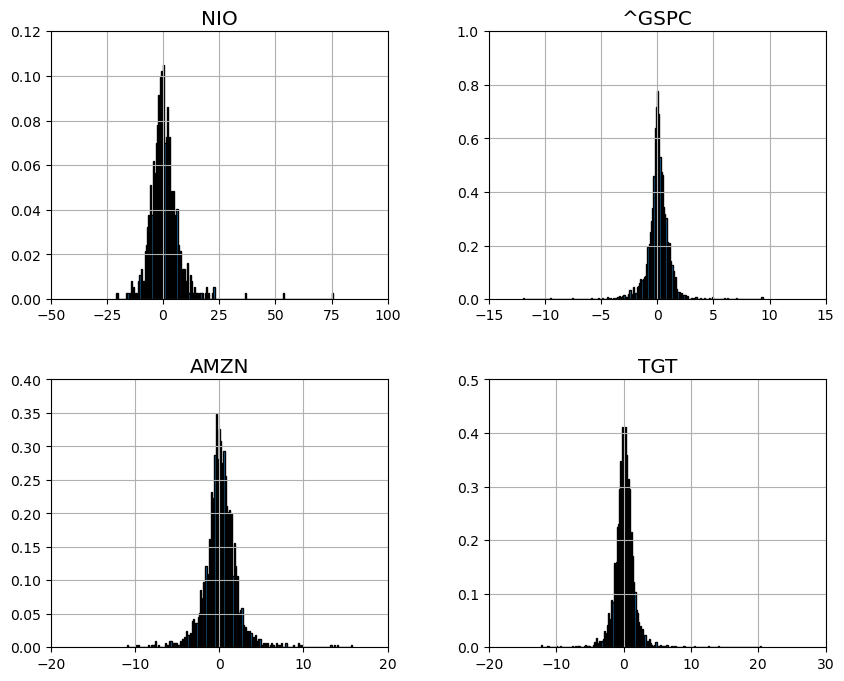

In [84]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
plt.rcParams.update({'font.size': 36})
plt.style.use('classic')
#for key in price_change_data:
price_change_data.hist(bins = 200, alpha = 1, label = price_change_data.keys(), ax = ax, density = True)

adding in some more descriptive statistics: 

<ipython-input-78-9a0e0e74f755>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-78-9a0e0e74f755>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


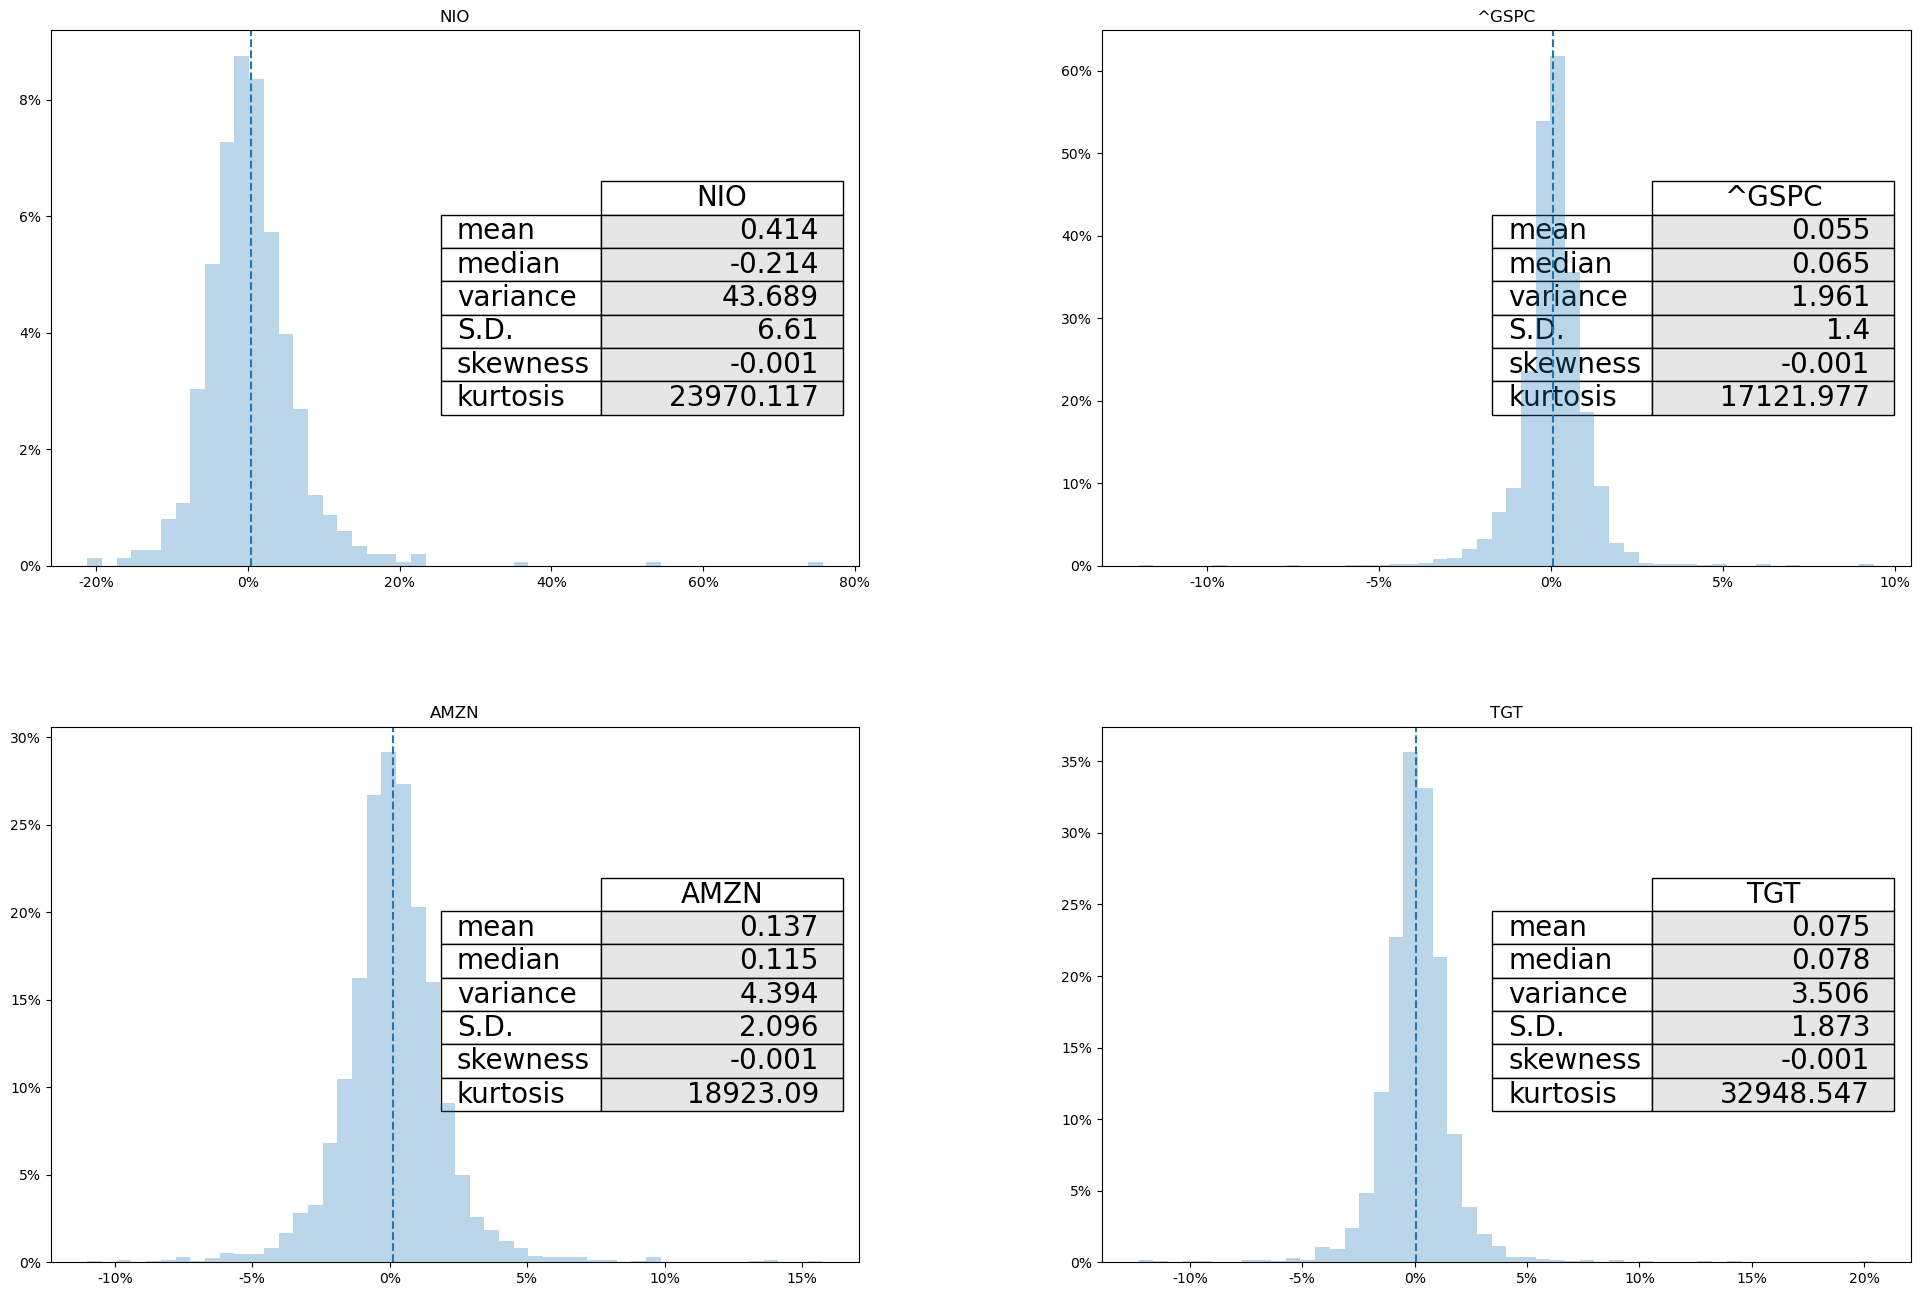

In [78]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, colWidths=[.12], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(2.5,2)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)

   

a few interesting findings from the stats. Obviously, NIO has been a heck of a ride for investors. I already mentioned its massive variance, but the median is actually negative for the daily change, which isnt true for any of the other stocks, but its mean daily change is the biggest. So if an investor randomly invested and pulled out on randomly selected days, they would likely lose money, but staying in for the roller coaster ride would result in big gains. 

<ipython-input-108-1068c05abb05>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-108-1068c05abb05>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


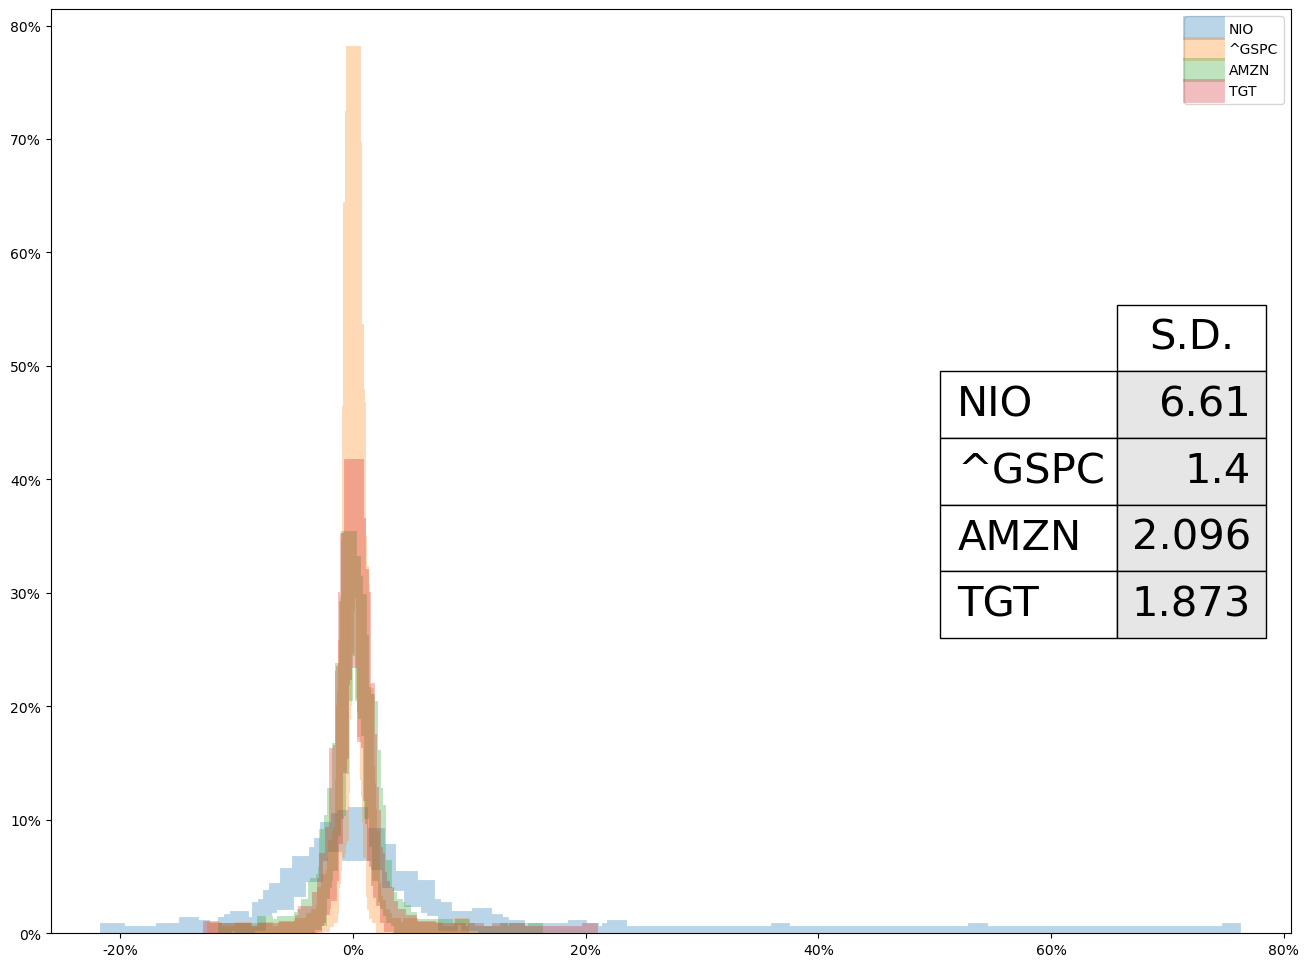

In [108]:
fig, ax = plt.subplots(figsize = (16,12))
for key in price_change_data:
    price_change_data[key].hist(bins = 200, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(1.2,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.style.use('default')
plt.legend()

this plot shows the density function of how much a stock's price is gonna change on a randomly selected day. As we can see, the SP500 is clogging things up with a very high probability that the stock will change very near 0% for the day. NIO has a umuch wider spread, which we knew. 